In [ ]:
## First process is Cleaning, and there's two version of Cleaning dataset
## because there's different it data format

In [ ]:
## First version data cleaning for normal traffic dataset

In [ ]:
#!/usr/bin/env python

import pandas as pd
import sys
from functools import reduce
import socket
import struct
import ipaddress

filename = sys.argv[1]
file1 = pd.read_csv(filename)
file1.head(10)
file1.isnull().sum
#print(file1.isnull().sum)
# step-1 to replace all null
update_file = file1.fillna(" ")
update_file.isnull().sum()
#print (update_file.isnull().sum()) 
update_file.to_csv('update_'+filename, index = False)
# step-2 to remove all rows with null value
update_file = file1.fillna(0)
#print (update_file.isnull().sum())
# step-3 to convert tcp.flag, ip.dst, ip.src to integer
# (unused)update_file['tcp.flags'] = update_file['tcp.flags'].apply(lambda x: int(str(x), 16))
update_file['ip.dst'] = update_file['ip.dst'].apply(lambda x: int(ipaddress.IPv4Address(x)))
update_file['ip.src'] = update_file['ip.src'].apply(lambda x: int(ipaddress.IPv4Address(x)))
update_file.to_csv('update_'+filename, index = False)

In [ ]:
## Second data cleaning format is to clean intrusion dataset that has used tcp.flags in the process

In [ ]:
#!/usr/bin/env python

import pandas as pd
import sys
from functools import reduce
import socket
import struct
import ipaddress
import macaddress

filename = sys.argv[1]
file1 = pd.read_csv(filename)
file1.head(10)
file1.isnull().sum
#print(file1.isnull().sum)
# step-1 to replace all null
update_file = file1.fillna(" ")
update_file.isnull().sum()
#print (update_file.isnull().sum()) 
update_file.to_csv('update_'+filename, index = False)
# step-2 to remove all rows with null value
update_file = file1.fillna(0)
#print (update_file.isnull().sum())
# step-3 to convert tcp.flag, ip.dst, ip.src to integer
# (unused)update_file['tcp.flags'] = update_file['tcp.flags'].apply(lambda x: int(str(x), 16))
update_file['ip.dst'] = update_file['ip.dst'].apply(lambda x: int(ipaddress.IPv4Address(x)))
update_file['ip.src'] = update_file['ip.src'].apply(lambda x: int(ipaddress.IPv4Address(x)))
update_file['eth.addr'] = update_file['eth.addr'].apply(lambda x: int(macaddress.EUI48(x)))
update_file['eth.dst'] = update_file['eth.dst'].apply(lambda x: int(macaddress.EUI48(x)))
update_file.to_csv('update_'+filename, index = False)

In [2]:
9# Create a list containing the index numbers you want to remove

import pandas as pd
import sys
from functools import reduce
import socket
import struct
import ipaddress


df = pd.read_csv('Labeled_update_MAC_Flooding_attack.csv')


index_list = list(range(10482, 19338))
df.drop(df.index[index_list], inplace =True)
df.shape
df
df.to_csv('Labeled_update_MAC_Flooding_attack.csv', index=False)

In [ ]:
## Second process is to label the dataset with Normal_Traffic and Abnormal_Traffic

In [ ]:
import sys
import csv

label = sys.argv[1]
file_name = sys.argv[2]

file = open(file_name)
content = csv.reader(file)
#row0 = content.next() for python2 and next(content) for python 3
row0 = next(content)
row0.append('label')
all = []
all.append(row0)
for item in content:
    item.append(label)
    all.append(item)

new_file = open("Labeled_" + file_name, 'w')
writer = csv.writer(new_file, lineterminator='\n')
writer.writerows(all)

In [1]:
## 3rd Proces is to create a master dataset by combine both normal traffic 
## and intrusion traffic for MAC attack.

In [4]:
import pandas as pd
import glob
import os
import csv

# setting the path for joining multiple files
files = os.path.join("C:/Users/Admin/Desktop/CSV file/T Shark extract/4.Completed Store/MAC Flooding","Labeled*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

df.to_csv('Master_MAC_Attack.csv', index=False)


Resultant CSV after joining all CSV files at a particular location...
           ip.src      ip.dst         eth.addr          eth.dst  \
0        98035027  3253489514  115848086057608  115848086057608   
1      1347488552  1542973513  188194502993945  188194502993945   
2      2053479744  1092413464    4754214429298    4754214429298   
3      3908210972  2355885408  149069977429158  149069977429158   
4       692955396  2660973117   86080524491827   86080524491827   
...           ...         ...              ...              ...   
20958  3232235777  3232235778   13259053006848   13259053006848   
20959           0           0  281474976710655  281474976710655   
20960           0           0  281474976710655  281474976710655   
20961           0           0    1652522221568    1652522221568   
20962           0           0  281474976710655  281474976710655   

       frame.time_relative  frame.time_delta             label  
0                 0.000000          0.000000  Abnormal_Traff

In [ ]:
## Remove Ununsed Features

In [3]:
import pandas as pd
import csv

#read dataset
data = pd.read_csv('Master_MAC_Attack.csv')

# display
#print(data)
  
# pop function which is used in removing or deleting columns from the CSV files
data.pop('ip.flags.mf')
data.pop('ip.fragment')
data.pop('ip.fragment.count')
data.pop('ip.fragments')
data.pop('tcp.window_size')
data.pop('tcp.ack')
data.pop('tcp.seq')
data.pop('tcp.len')
data.pop('tcp.stream')
data.pop('tcp.urgent_pointer')
data.pop('tcp.flags')
data.pop('tcp.analysis.ack_rtt')
data.pop('tcp.segments')
data.pop('tcp.reassembled.length')
data.pop('http.request')
data.pop('udp.port')
data.pop('tcp.time_relative')
data.pop('tcp.time_delta')
         
  
# display
print(data)
data.to_csv('Master_MAC_Attack.csv', index=False)


          ip.src      ip.dst  ip.len  ip.flags.df  ip.ttl  ip.proto  \
0              0           0     0.0          0.0     0.0       0.0   
1              0           0     0.0          0.0     0.0       0.0   
2              0           0     0.0          0.0     0.0       0.0   
3              0           0     0.0          0.0     0.0       0.0   
4              0           0     0.0          0.0     0.0       0.0   
...          ...         ...     ...          ...     ...       ...   
1237  3232235778  3232235780    84.0          1.0    64.0       1.0   
1238  3232235780  3232235778    84.0          0.0    64.0       1.0   
1239           0           0     0.0          0.0     0.0       0.0   
1240           0           0     0.0          0.0     0.0       0.0   
1241           0           0     0.0          0.0     0.0       0.0   

      frame.time_relative  frame.time_delta           label  
0                0.000000          0.000000   DHCP_Spoofing  
1                0.7549

## last step is to train with the model

In [5]:
import pydotplus

[[98035027 3253489514 115848086057608 ... 0.0 0.0 'Abnormal_Traffic']
 [1347488552 1542973513 188194502993945 ... 0.000385 0.000385
  'Abnormal_Traffic']
 [2053479744 1092413464 4754214429298 ... 0.002072 0.001687
  'Abnormal_Traffic']
 ...
 [0 0 281474976710655 ... 5036.893622 0.994754 'Normal_Traffic']
 [0 0 1652522221568 ... 5037.37203 0.478408 'Normal_Traffic']
 [0 0 281474976710655 ... 5037.888027 0.515997 'Normal_Traffic']]
LR Accuracy: 0.499046 (+/- 0.006155)
LDA Accuracy: 0.912430 (+/- 0.004364)
KNN Accuracy: 0.997751 (+/- 0.000462)
CART Accuracy: 0.999319 (+/- 0.000431)


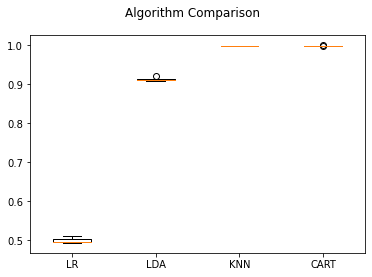


 CART results on 30% test set 

0.9993186463774699

CART accuracy test: 

0.9993186463774699
[[2196    2]
 [   1 2204]]
                  precision    recall  f1-score   support

Abnormal_Traffic       1.00      1.00      1.00      2198
  Normal_Traffic       1.00      1.00      1.00      2205

        accuracy                           1.00      4403
       macro avg       1.00      1.00      1.00      4403
    weighted avg       1.00      1.00      1.00      4403


CART results on final 30% validation 


CART accuracy validation: 

0.9993639688344729
[[3158    1]
 [   3 3127]]
                  precision    recall  f1-score   support

Abnormal_Traffic       1.00      1.00      1.00      3159
  Normal_Traffic       1.00      1.00      1.00      3130

        accuracy                           1.00      6289
       macro avg       1.00      1.00      1.00      6289
    weighted avg       1.00      1.00      1.00      6289



In [10]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
import joblib
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os     

# import dataset
dataset = pandas.read_csv("Master_MAC_Attack.csv")

#print (dataset.shape)

# head
#print(dataset.head(20))

# descriptions
#print(dataset.describe())

# class distribution
#print(dataset.groupby('label').size())

# split dataset
array = dataset.values
print (array)
X = array[:,0:6]
Y = array[:,6]
validation_size = 0.30
seed = 42

# Split dataset into training set and test set
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
X_train_set, X_test, Y_train_set, Y_test = model_selection.train_test_split(X_train, Y_train, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
scoring = 'accuracy'

# Fit algorithm model

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s Accuracy: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset
print("\n CART results on 30% test set \n")
# Create Decision Tree classifer object
cart = DecisionTreeClassifier()
# Train Decision Tree Classifer
cart.fit(X_train_set, Y_train_set)
#saving the model using joblib 
filename = 'finalized_DT_model.sav'
joblib.dump(cart, filename)
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print (result)
#Predict the response for test dataset
predictions_rfc = cart.predict(X_test)
print("\nCART accuracy test: \n")
print(accuracy_score(Y_test, predictions_rfc))
print(confusion_matrix(Y_test, predictions_rfc))
print(classification_report(Y_test, predictions_rfc))

# Make predictions on test dataset
print("\nCART results on final 30% validation \n")
newcart = DecisionTreeClassifier()
newcart.fit(X_train_set, Y_train_set)
newpredictions_rfc = newcart.predict(X_validation)
print("\nCART accuracy validation: \n")
print(accuracy_score(Y_validation, newpredictions_rfc))
print(confusion_matrix(Y_validation, newpredictions_rfc))
print(classification_report(Y_validation, newpredictions_rfc))
df = dataset.reset_index(drop = False)